# Bikes Problem

### Problem Statement

We have data about a company that rents bikes. The business owner wants solutions in order to increase his profits
The employer eventually wants a website where information about the day, weather, temperature, etc. is entered, and then the number of renters for bikes is predicted.

### Data Fields

- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather - 
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

np.random.seed(42)
sns.set(rc={'figure.figsize':[7,7]},font_scale=1.2)

In [2]:
df=pd.read_csv(r'E:\karim ahmed\Data Science projects for profolio\DS_PRO\bike_share\data\bikes.csv')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Notes
Data is collected every hour

### **Data Analysis** 
**Questitions** 
1. which is golden hour of(Day) 
2. which is golden day of(week) 
3. which is golden month of(year) 
4. the relationship between each feature and (registers & casual)
5. rentals during holidays and workdays 
6. rentals during morning and at night 

### Quick Exploration

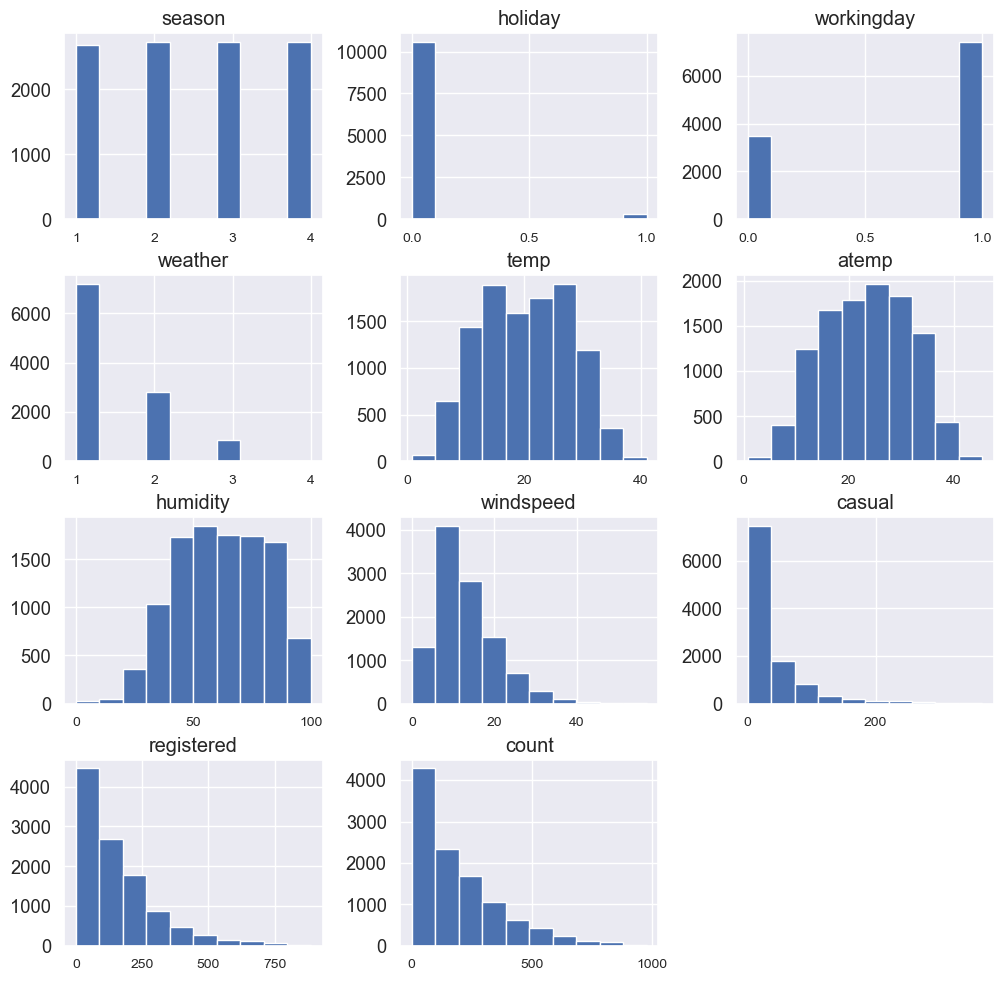

In [4]:
df.hist(figsize=(12,15),layout=(5,3),xlabelsize=10,xrot=0)
plt.show()

In [5]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [6]:
df = df.drop(df[df["weather"] ==4].index)

### Early Splitting

In [7]:
df_train,df_test=train_test_split(df,test_size=0.2,random_state=42)

In [8]:
df_train.to_csv('training_data.csv')
df_test.to_csv('testing_data.csv')

### Copy of training set

In [9]:
df=df_train.copy()

### **Data Analysis** 
**Questitions** 
1. which is golden hour of(Day) 
2. which is golden day of(week) 
3. which is golden month of(year) 
4. the relationship between each feature and (registers & casual)
5. rentals during rush hours (7-9 AM) & (3-5 PM) when peaple go and out from work 
6. rentals during holidays and workdays 
7. rentals during morning and at night 

In [10]:
df['season'].value_counts()

2    2201
4    2196
3    2182
1    2129
Name: season, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 10378 to 7271
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8708 non-null   object 
 1   season      8708 non-null   int64  
 2   holiday     8708 non-null   int64  
 3   workingday  8708 non-null   int64  
 4   weather     8708 non-null   int64  
 5   temp        8708 non-null   float64
 6   atemp       8708 non-null   float64
 7   humidity    8708 non-null   int64  
 8   windspeed   8708 non-null   float64
 9   casual      8708 non-null   int64  
 10  registered  8708 non-null   int64  
 11  count       8708 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 884.4+ KB


In [12]:
season={1:'spring',2:'summer',3:'fall',4:'winter'}
weather={1:'Clear',2:'Cloudy',3:'Snow'}

In [13]:
df['weather']=df['weather'].replace(weather)
df['season']=df['season'].replace(season) 

In [14]:
df['datetime']=pd.to_datetime(df['datetime'],format='%Y-%m-%d %H:%M:%S',errors='coerce')

In [15]:
df['year']=df['datetime'].dt.year 
df['month_name']=df['datetime'].dt.month_name()
df['month']=df['datetime'].dt.month
df['day_of_week']=df['datetime'].dt.day_name() 
df['hour']=df['datetime'].dt.hour 

In [16]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month_name,month,day_of_week,hour
10378,2012-11-17 20:00:00,winter,0,0,Cloudy,13.94,17.425,66,6.0032,30,142,172,2012,November,11,Saturday,20
2815,2011-07-06 05:00:00,fall,0,1,Clear,27.88,31.820,83,6.0032,5,30,35,2011,July,7,Wednesday,5
8695,2012-08-04 16:00:00,fall,0,0,Clear,36.90,40.910,39,19.9995,197,253,450,2012,August,8,Saturday,16
9026,2012-08-18 11:00:00,fall,0,0,Clear,29.52,33.335,51,0.0000,180,356,536,2012,August,8,Saturday,11
1543,2011-04-10 04:00:00,summer,0,0,Cloudy,14.76,18.180,93,7.0015,3,2,5,2011,April,4,Sunday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5735,2012-01-14 03:00:00,spring,0,0,Clear,5.74,8.335,54,7.0015,6,14,20,2012,January,1,Saturday,3
5191,2011-12-10 09:00:00,winter,0,0,Clear,11.48,12.880,61,19.0012,15,134,149,2011,December,12,Saturday,9
5390,2011-12-18 16:00:00,winter,0,0,Clear,11.48,13.635,48,16.9979,27,207,234,2011,December,12,Sunday,16
860,2011-02-19 07:00:00,spring,0,0,Clear,15.58,19.695,17,35.0008,6,16,22,2011,February,2,Saturday,7


In [17]:
# 1- which is golden hour of(Day)

In [18]:
df.groupby('hour')[['registered']].mean().sort_values(by='registered',ascending=False)

,registered
hour,
17,386.656085
18,367.557377
8,343.205556
19,267.851648
16,240.554645
7,201.025281
9,194.832877
20,188.505650
12,186.201117


<Axes: xlabel='hour', ylabel='registered'>

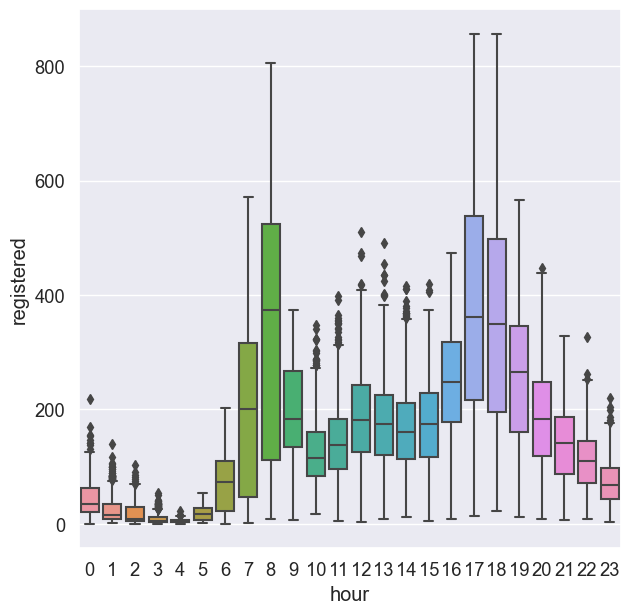

In [19]:
sns.boxplot(x='hour',y='registered',data=df)

**rentals of registered users incraesed in 8,5,6**

In [20]:
df.groupby('hour')[['casual']].mean().sort_values(by='casual',ascending=False)

,casual
hour,
14,78.670330
17,76.571429
15,75.563830
16,75.147541
13,72.277311
12,67.754190
18,59.144809
11,59.013889
19,48.826923


<Axes: xlabel='hour', ylabel='casual'>

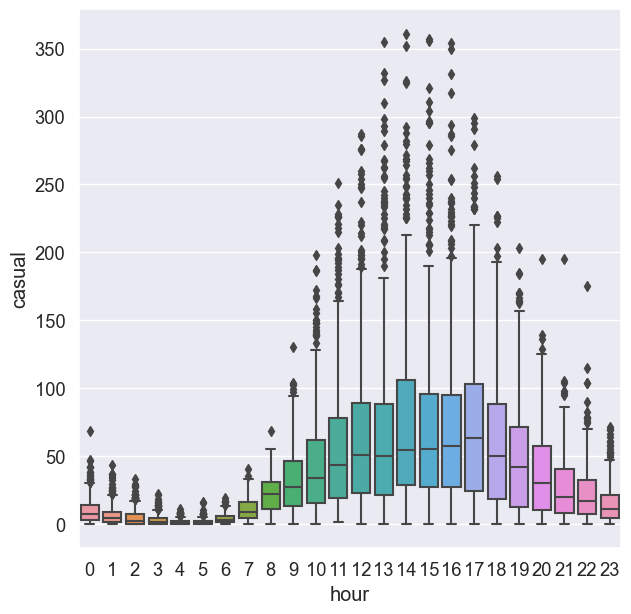

In [21]:
sns.boxplot(x='hour',y='casual',data=df)

**rentals of casual users incresed then decreased**

In [22]:
# which is golden day of(week)

In [23]:
df.groupby('day_of_week')[['registered']].mean().sort_values(by='registered',ascending=False)

,registered
day_of_week,
Thursday,175.611698
Friday,166.153168
Wednesday,164.855980
Tuesday,164.403537
Monday,160.890433
Saturday,131.750198
Sunday,122.697400


<Axes: xlabel='registered', ylabel='day_of_week'>

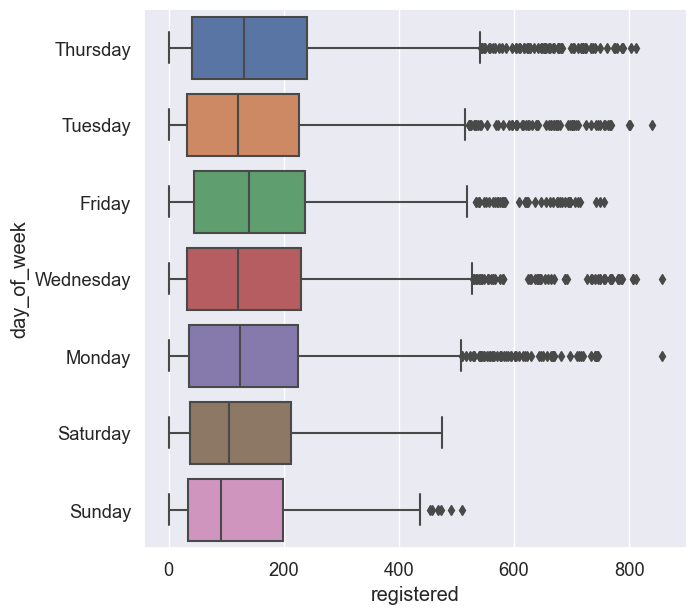

In [24]:
sns.boxplot(x='registered',y='day_of_week',data=df,order=['Thursday','Tuesday','Friday','Wednesday',
                                                        'Monday','Saturday','Sunday' ])

**registered users rented bikes during weekdays than weekend days**

In [25]:
df.groupby('day_of_week')[['casual']].mean().sort_values(by='casual',ascending=False)

,casual
day_of_week,
Saturday,63.167589
Sunday,56.409771
Friday,30.652767
Monday,29.816844
Thursday,23.996751
Tuesday,23.420418
Wednesday,22.402766


<Axes: xlabel='casual', ylabel='day_of_week'>

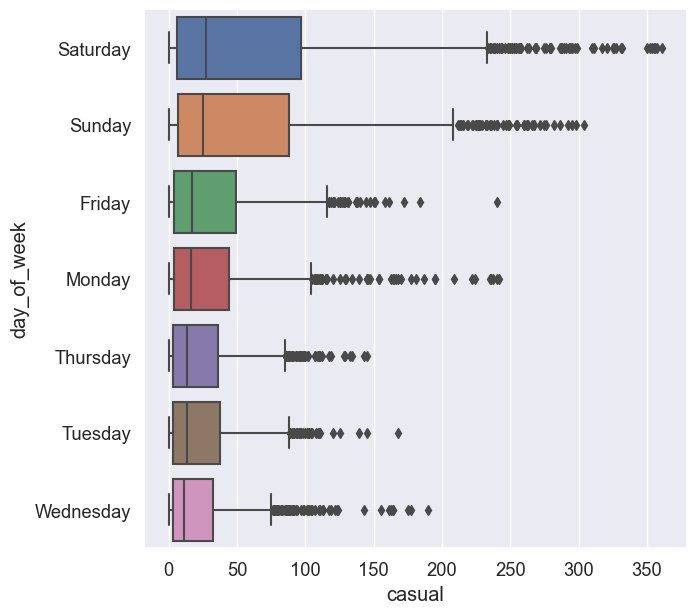

In [26]:
sns.boxplot(x='casual',y='day_of_week',data=df,order=['Saturday','Sunday','Friday','Monday',
                                                        'Thursday','Tuesday','Wednesday' ])

**in contrast casual users rented bikes in weekend days than weekdays**

In [27]:
# which is golden month of(year)

In [28]:
df.groupby('month_name')[['registered']].mean().sort_values(by='registered',ascending=False)

,registered
month_name,
June,187.559671
October,184.339752
August,182.913161
July,179.251374
September,177.069735
May,173.977181
November,165.895861
December,160.793056
April,140.826685


<Axes: xlabel='registered', ylabel='month_name'>

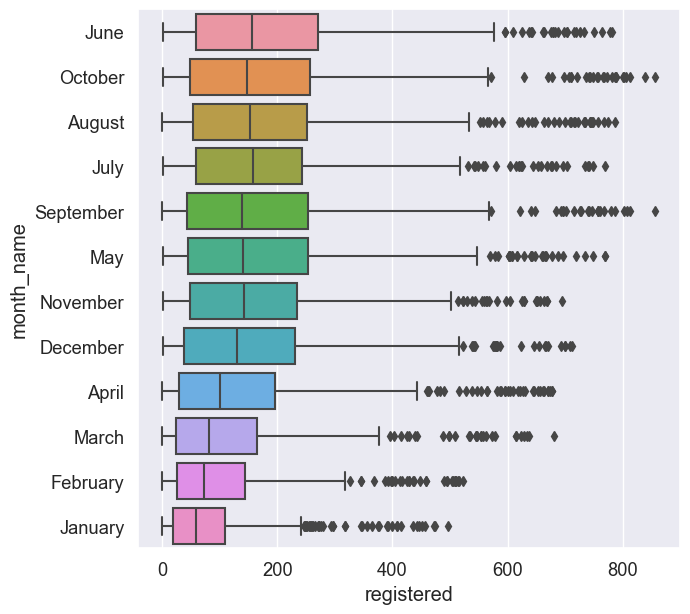

In [29]:
sns.boxplot(x='registered',y='month_name',data=df,order=['June','October','August','July','September','May','November','December','April','March','February','January'])

****

In [30]:
df.groupby('month_name')[['casual']].mean().sort_values(by='casual',ascending=False)

,casual
month_name,
July,56.140110
June,53.585734
August,49.808684
September,49.039052
May,45.311409
April,44.213205
October,40.944979
November,27.419226
March,26.439437


<Axes: xlabel='registered', ylabel='month_name'>

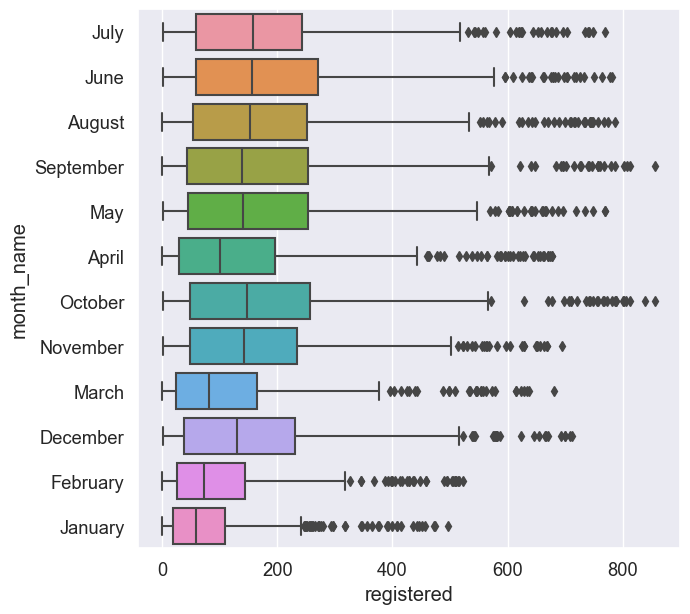

In [31]:
sns.boxplot(x='registered',y='month_name',data=df,order=df.groupby('month_name')[['casual']].mean().sort_values(by='casual',ascending=False).index.tolist())

In [32]:
# golden weather

In [33]:
df.groupby('weather')[['casual']].mean().sort_values(by='casual',ascending=False)

,casual
weather,
Clear,40.241619
Cloudy,30.425861
Snow,17.186861


<Axes: xlabel='weather', ylabel='registered'>

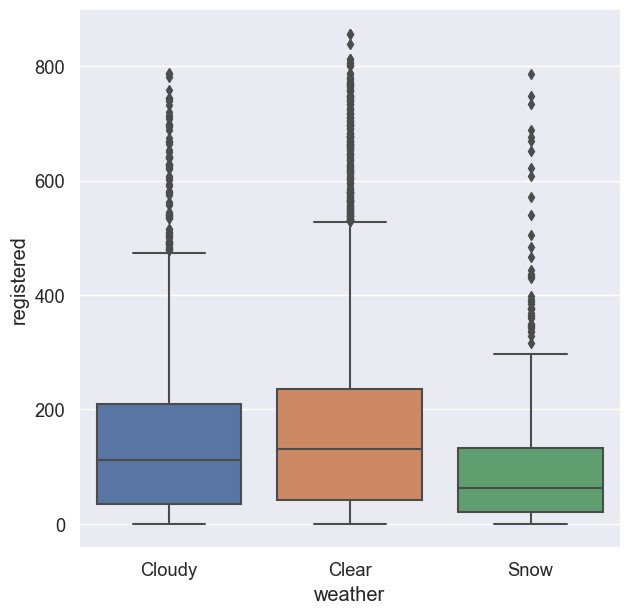

In [34]:
sns.boxplot(x='weather',y='registered',data=df)

In [35]:
df.groupby('weather')[['casual']].mean().sort_values(by='casual',ascending=False)

,casual
weather,
Clear,40.241619
Cloudy,30.425861
Snow,17.186861


<Axes: xlabel='weather', ylabel='casual'>

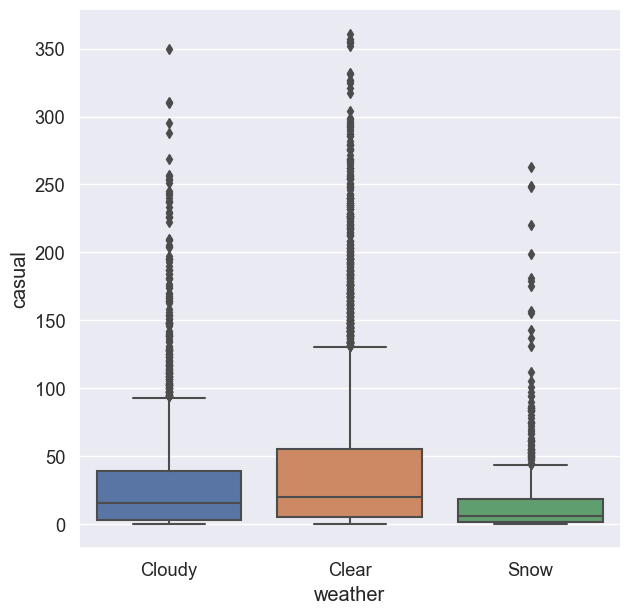

In [36]:
sns.boxplot(x='weather',y='casual',data=df)

**registered and casual users prefered clear weather**

In [37]:
# golden season

In [38]:
df.groupby('season')[['casual']].mean().sort_values(by='casual',ascending=False)

,casual
season,
fall,51.668194
summer,47.689232
winter,28.257286
spring,15.327384


<Axes: xlabel='season', ylabel='casual'>

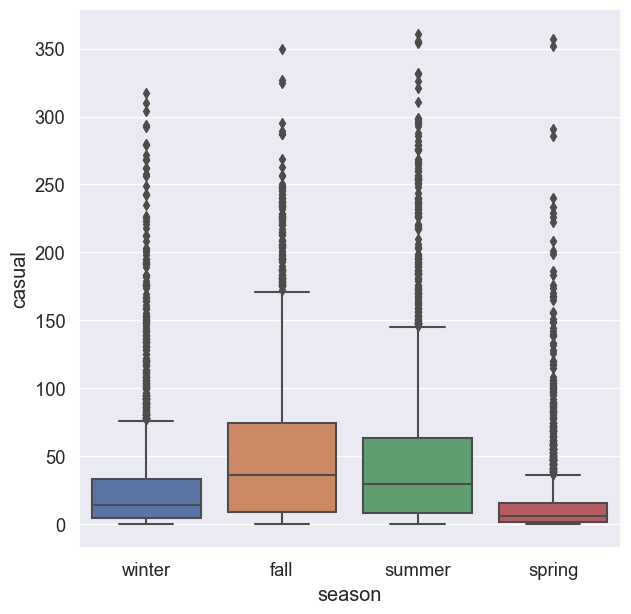

In [39]:
sns.boxplot(x='season',y='casual',data=df)

In [40]:
df.groupby('season')[['registered']].mean().sort_values(by='registered',ascending=False)

,registered
season,
fall,179.771311
winter,170.328780
summer,167.526124
spring,100.800845


<Axes: xlabel='season', ylabel='registered'>

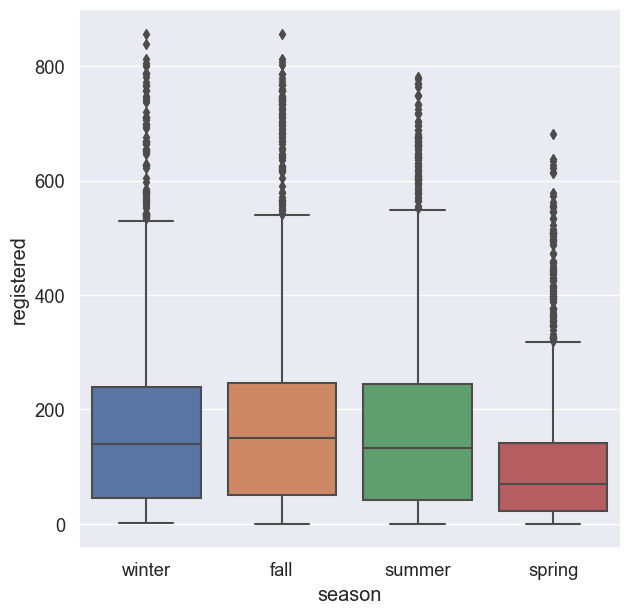

In [41]:
sns.boxplot(x='season',y='registered',data=df)

In [42]:
df.groupby('season')[['workingday','registered']].sum().sort_values(by='registered',ascending=False)

,workingday,registered
season,,
fall,1472,392261
winter,1502,374042
summer,1523,368725
spring,1427,214605


**the registered users rented bikes all seasons , there is season has minimum rentals ,this is because it has less working days**

**we can say that register users use bikes for bussiness while casual users prefer summer and fall seasons**

In [43]:
# correlation between features and casual&registers

In [44]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month_name', 'month', 'day_of_week', 'hour'],
      dtype='object')

array([[<Axes: xlabel='temp', ylabel='temp'>,
        <Axes: xlabel='humidity', ylabel='temp'>,
        <Axes: xlabel='windspeed', ylabel='temp'>,
        <Axes: xlabel='casual', ylabel='temp'>,
        <Axes: xlabel='registered', ylabel='temp'>],
       [<Axes: xlabel='temp', ylabel='humidity'>,
        <Axes: xlabel='humidity', ylabel='humidity'>,
        <Axes: xlabel='windspeed', ylabel='humidity'>,
        <Axes: xlabel='casual', ylabel='humidity'>,
        <Axes: xlabel='registered', ylabel='humidity'>],
       [<Axes: xlabel='temp', ylabel='windspeed'>,
        <Axes: xlabel='humidity', ylabel='windspeed'>,
        <Axes: xlabel='windspeed', ylabel='windspeed'>,
        <Axes: xlabel='casual', ylabel='windspeed'>,
        <Axes: xlabel='registered', ylabel='windspeed'>],
       [<Axes: xlabel='temp', ylabel='casual'>,
        <Axes: xlabel='humidity', ylabel='casual'>,
        <Axes: xlabel='windspeed', ylabel='casual'>,
        <Axes: xlabel='casual', ylabel='casual'>,
        

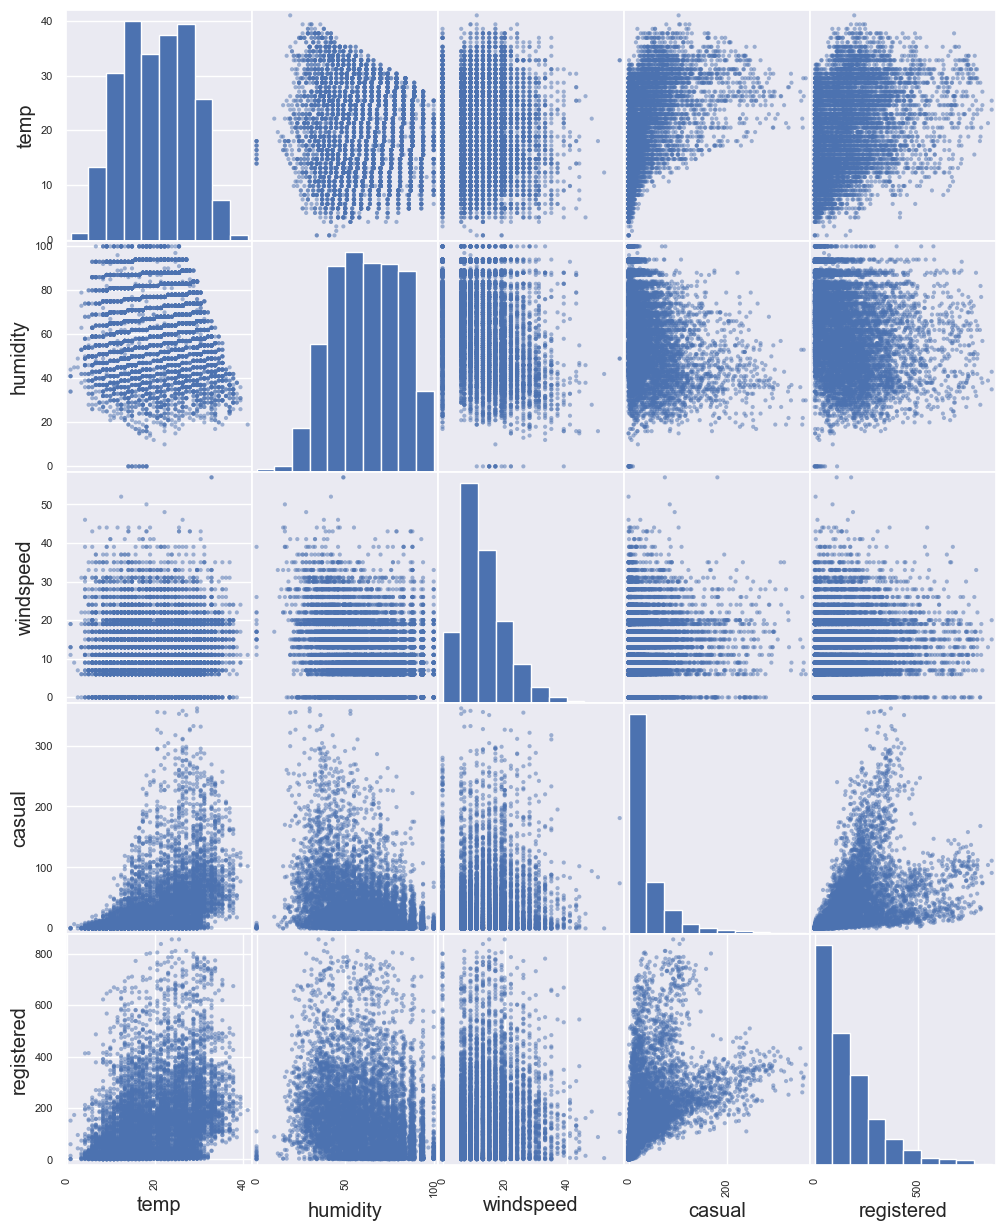

In [45]:
scatter_matrix(df[['temp', 'humidity', 'windspeed', 'casual', 'registered']],figsize=(12,15))

In [46]:
corr_matrix=df.corr()
corr_matrix[['casual','registered']]

C:\Users\PC\AppData\Local\Temp\ipykernel_12968\1951581570.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


,casual,registered
holiday,0.042230,-0.023893
workingday,-0.315342,0.123779
temp,0.467486,0.313038
atemp,0.461952,0.308801
humidity,-0.354614,-0.270037
windspeed,0.093937,0.092235
casual,1.000000,0.495128
registered,0.495128,1.000000
count,0.688829,0.970887
year,0.140669,0.259317


* good correlated attributes :humidity,temp,workingday

### Feature Engineering

In [47]:
def is_rush_hour(hour) : 
    return 1 if hour in [17,18,8,19,16,7,9] else 0 
df['is_rush_hour']=df['hour'].apply(is_rush_hour)

In [48]:
def is_weekend(day) : 
    return 1 if day in ['Saturday','Sunday'] else 0 
df['is_weekend']=df['day_of_week'].apply(is_weekend)

In [49]:
corr_matrix=df.corr()
corr_matrix[['casual','registered']]

C:\Users\PC\AppData\Local\Temp\ipykernel_12968\1951581570.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


,casual,registered
holiday,0.042230,-0.023893
workingday,-0.315342,0.123779
temp,0.467486,0.313038
atemp,0.461952,0.308801
humidity,-0.354614,-0.270037
windspeed,0.093937,0.092235
casual,1.000000,0.495128
registered,0.495128,1.000000
count,0.688829,0.970887
year,0.140669,0.259317


Not bad !! the two features we added affect the targets 

In [50]:
pd.to_pickle(df,'processed_1.pickle')